## Electrostatic Potential Descriptor Library

This is a library of 24 two dimensional electrostatic potential based molecular descriptors based on  
**[Hunter, C. A. (2004). Angewandte Chemie - International Edition, 43(40), 5310–5324](https://doi.org/10.1002/anie.200301739)**  

The library has been implemented and developed by Andre Frade (with support of Patrick McCabe and Richard Cooper).

This is a basic tour on how to use the electrostatic potential descriptor library. 

##### 1. Load some input examples

In [1]:
import pandas as pd
smiles_list = pd.read_pickle('input_example')
smiles_list = smiles_list.values

print(smiles_list[:2])

['CC(=O)NN1C=NN=C1N(N=Cc1c(Cl)cccc1Cl)C(C)=O'
 'Cc1ccc(cc1)c1nc2ccc3ccccc3c2cc1CCO']


##### 2. Import and instantiate the library

In [1]:
# Initiallise
from electrostatic_potential import ElectrostaticPotential

ep = ElectrostaticPotential()

RDKit WARNING: [12:12:09] Enabling RDKit 2019.09.3 jupyter extensions


##### 3. Calculate descriptors for the first molecule

SMILES: CC[N-]C(=O)CC

Before adjustment: {'amide': 1, 'amine': 1}
After adjustment:  {'amide': 1}

Max:       2.9  8.3
Min:       2.9  8.3
Total:     2.9  8.3
Average:   2.9  8.3
MW norm:   0.029  0.082
VSA norm:  0.066  0.189
LogP norm: 5.446  15.587
Alpha_VSA: [0, 0, 0, 0.124, 0]
Beta_VSA:  [0, 0, 0, 0, 0.138]



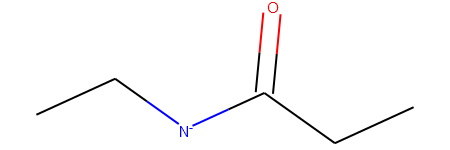

In [3]:
from rdkit import Chem

smiles = smiles_list[0]
mol = Chem.MolFromSmiles(smiles)
ep_values = ep.calc_hunter_electrostatic_descriptors(mol)

print('SMILES: %s\n' %smiles)
print('Groups identified: %s\n' %ep.adjusted_matches())
print('Max',ep_values.MaxAlpha, ep_values.MaxBeta)
print('Min',ep_values.MinAlpha, ep_values.MinBeta)
print('Total',ep_values.TotalAlpha, ep_values.TotalBeta)
print('Average',ep_values.AverageAlpha, ep_values.AverageBeta)
print('MolWt Normalised',ep_values.AlphaMolWtNormalised, ep_values.BetaMolWtNormalised)
print('VSA Normalised',ep_values.AlphaVSANormalised, ep_values.BetaVSANormalised)
print('LogP Normalised',ep_values.AlphaLogPNormalised, ep_values.BetaLogPNormalised)
print('Alpha VSA',ep_values.Alpha_VSA0, ep_values.Alpha_VSA1, ep_values.Alpha_VSA2, ep_values.Alpha_VSA3, ep_values.Alpha_VSA4)
print('Beta VSA',ep_values.Beta_VSA0, ep_values.Beta_VSA1, ep_values.Beta_VSA2, ep_values.Beta_VSA3, ep_values.Beta_VSA4)
mol

In [4]:
# run unit testing
%run testElectrostaticPotentialLib.py

..............
----------------------------------------------------------------------
Ran 14 tests in 0.384s

OK


## VSA descriptors

#### Development

Just uncomment silenced lines in  _VSA_alpha_beta.

1. Calculate the per-atom contributions to the:
    - gasteiger partial charge (atomic_pcharge)
    - vdw surface area (atomic_vsa):

2. For each functional group:
    - retrieve the correspondent atoms gasteiger partial charge (local_pcharge): 
        - the most negative is the alpha atom
        - the most positive is the beta atom
        - if more than one min or max, then all those are considered
    - the correspondent atomic vsa (local_vsa):
        - accumulate alpha vsa for all occurences of the same group
        - accumulate beta vsa for all occurences of the same group  
            
4. The vsa values are normalised by the total vsa. These values are binned according to the range of alpha and beta values they represent.

['C0', 'C1', 'C2', 'C3']
[6.924, 6.421, 6.421, 6.924]
[-0.065, -0.056, -0.056, -0.065]


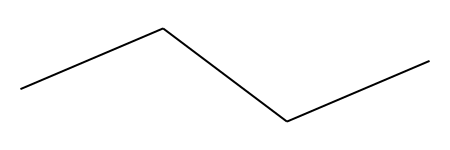

In [24]:
# how to access 
from rdkit.Chem import AllChem
mol = Chem.MolFromSmiles('CCCC')

# atoms per index
atoms = [mol.GetAtomWithIdx(e).GetSymbol()+str(e) for e in range(mol.GetNumAtoms())]
                
# vsa atomic contributions
(ats, hs)= Chem.rdMolDescriptors._CalcLabuteASAContribs(mol, includeHs = True)
atomic_vsa = [round(vsa, 3) for vsa in ats]

# partial charge atomic contributions
AllChem.ComputeGasteigerCharges(mol)
atomic_partial_charge = [round(mol.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge'), 3) for i in range(mol.GetNumAtoms())]

print(atoms)
print(atomic_vsa)
print(atomic_partial_charge)
mol

#### Deciding on alpha and beta vsa bin size

Alpha range: 0.00 - 3.80 
Beta range:  0.00 - 9.90 


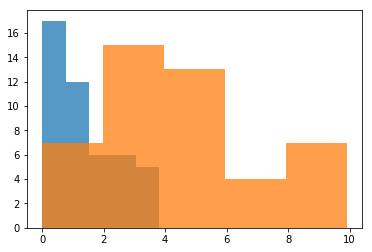

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

d = pd.read_csv('ABvalues.csv')

a=d.alpha.values
print('Alpha range: %.2f - %.2f ' %(min(a), max(a)))
plt.hist(a, 5, alpha=0.75)

b=d.beta.values
print('Beta range:  %.2f - %.2f ' %(min(b), max(b)))
plt.hist(b, 5, alpha=0.75)

plt.show()

## Test library

1. compute 24 descriptors for 1221 molecules (no error)
2. train a RF and check mean accuracy of 10 fold cv (compare against random)
3. print feature importance
4. print feature correlation


Test accuracy: 0.85 (+/-0.03) - RF 10-fold CV
Rand accuracy: 0.49 (+/-0.04) - RF 10-fold CV

Feature importance:

(0.11, 'b_VSA2')
(0.08, 'a_VSA1')
(0.07, 'average_beta')
(0.06, 'max_beta')
(0.05, 'total_alpha')
(0.05, 'average_alpha')
(0.04, 'total_beta')
(0.04, 'max_alpha')
(0.04, 'b_VSA6')
(0.04, 'alpha_logp_norm')
(0.04, 'a_VSA4')
(0.03, 'min_beta')
(0.03, 'beta_vsa_norm')
(0.03, 'beta_mw_norm')
(0.03, 'beta_logp_norm')
(0.03, 'b_VSA8')
(0.03, 'b_VSA4')
(0.03, 'alpha_vsa_norm')
(0.03, 'alpha_mw_norm')
(0.03, 'a_VSA3')
(0.03, 'a_VSA2')
(0.02, 'min_alpha')
(0.02, 'b_VSA0')
(0.01, 'a_VSA0')

Feature correlation matrix:



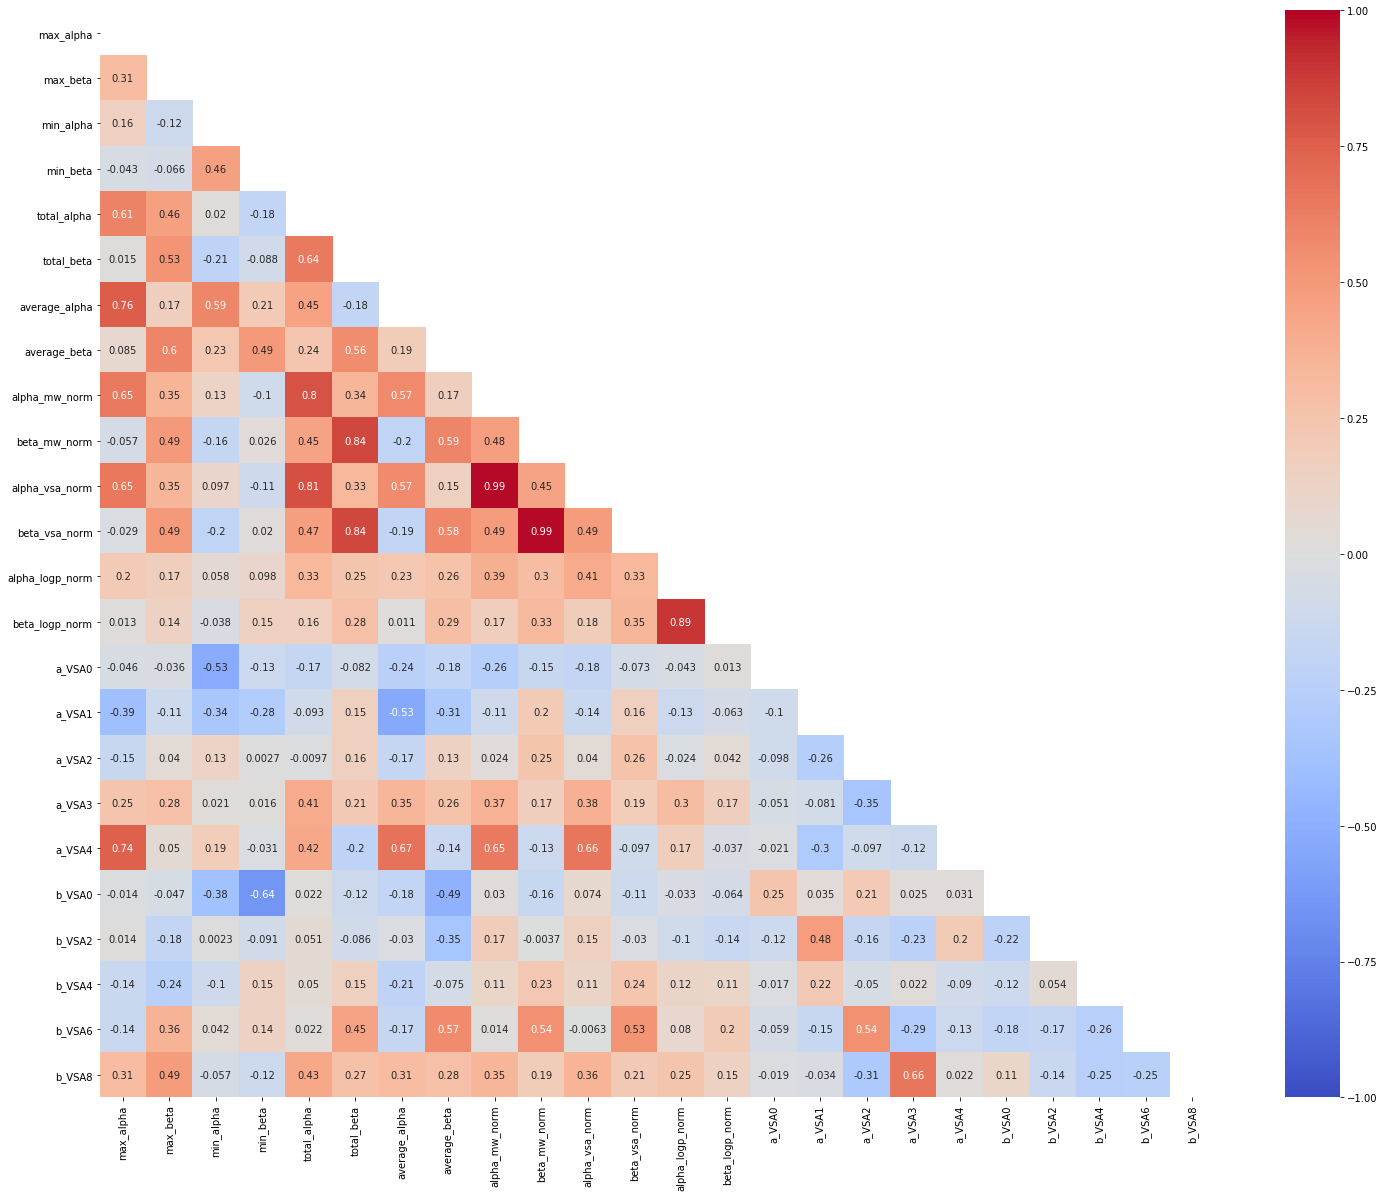

In [24]:
# calc descriptors
import pandas as pd
import numpy as np

df = pd.read_csv('test_data/ccdc_smiles.csv')
from sklearn.utils import shuffle
df = shuffle(df)
mols = [Chem.MolFromSmiles(smile) for smile in df.smiles.values]
df.insert(0, 'mol', mols)
df = df.fillna(np.nan)
df = df.dropna()

X, y, smiles = [], [], []
for mol, s, l  in zip(df.mol.values, df.smiles.values, df.labels.values):

    x = ep.alpha_beta(mol)
    X.append(x)
    smiles.append(s)
    y.append(l)

# fit and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=50)
clf.fit(X,y)

# test accuracy
scores = cross_val_score(clf, X, y, cv=10)
print('\nTest accuracy: %.2f (+/-%.2f) - RF 10-fold CV' %(scores.mean(), scores.std()))

# random accuracy
scores = cross_val_score(clf, X, shuffle(y), cv=10)
print('Rand accuracy: %.2f (+/-%.2f) - RF 10-fold CV' %(scores.mean(), scores.std()))

# feature importance
print('\nFeature importance:\n')
names = ['max_alpha', 'max_beta', 'min_alpha', 'min_beta', 'total_alpha', 'total_beta', 'average_alpha',
         'average_beta', 'alpha_mw_norm', 'beta_mw_norm', 'alpha_vsa_norm', 'beta_vsa_norm',
         'alpha_logp_norm', 'beta_logp_norm', 'a_VSA0', 'a_VSA1', 'a_VSA2',
         'a_VSA3', 'a_VSA4', 'b_VSA0', 'b_VSA2', 'b_VSA4', 'b_VSA6', 'b_VSA8']

a = sorted(zip(map(lambda x: round(x, 2), clf.feature_importances_), names), reverse=True)
for i in range(len(a)): print(a[i])
f = pd.DataFrame(X, columns=names)
corr = f.corr()

# feature correlation
import seaborn as sns
import matplotlib.pyplot as plt
print('\nFeature correlation matrix:\n')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(25,20))
sns.heatmap(corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1, mask=mask)
plt.show()

[0.25581274 0.16892928 0.12065087]


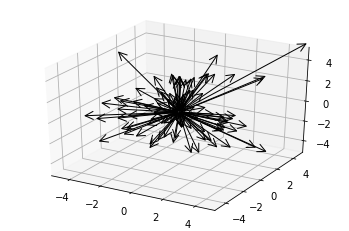

In [30]:
# check information gain

# scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_n = scaler.fit_transform(X)

# pca
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=0)

pc = pca.fit_transform(X_n)
print(pca.explained_variance_ratio_)

# plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
import numpy as np
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)


fig = plt.figure(50)
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-5,5)

for p in pc[:100]: 
    a = Arrow3D([0, p[0]], [0, p[1]], [0, p[2]], mutation_scale=20, lw=1, arrowstyle="->")
    ax.add_artist(a)

plt.show()

## Calc descriptors for CCDC

In [2]:
df = pd.read_csv('total_ccdc_smiles.csv')

s = []
X = []
invalid_smiles = []
for smile in df.smiles.values:
    
    mol = Chem.MolFromSmiles(smile)
    
    if mol is not None:
        
        x = ep.alpha_beta(mol)
        X.append(x)
        s.append(smile)
        
        if len(s)%50000 == 0: print('Smiles processed: ', len(s))
        
    else:
        invalid_smiles.append(smile)
        
cols = ['max_alpha', 'max_beta','min_alpha', 'min_beta', 'total_alpha',
        'total_beta', 'average_alpha', 'average_beta', 'alpha_mw_norm',
        'beta_mw_norm', 'alpha_vsa_norm', 'beta_vsa_norm', 'alpha_logp_norm',
        'beta_logp_norm', 'a_VSA0', 'a_VSA1', 'a_VSA2', 'a_VSA3', 'a_VSA4', 'b_VSA0',
        'b_VSA1', 'b_VSA2', 'b_VSA3', 'b_VSA4']

print('Invalid_smiles: ', len(invalid_smiles))
d = pd.DataFrame(X, columns=cols)
d.insert(0, 'smiles', s)
d.to_pickle('crystallizability_electr_potential_dataset')

Smiles processed:  50000
Smiles processed:  100000
Smiles processed:  150000
Smiles processed:  200000
Smiles processed:  250000
Smiles processed:  300000
Smiles processed:  350000
Smiles processed:  400000
invalid_smiles:  5319


In [3]:
d.shape

(441991, 25)

In [4]:
import pandas as pd
import seaborn as sns
d = pd.read_pickle('crystallizability_electr_potential_dataset')
d.describe()

,max_alpha,max_beta,min_alpha,min_beta,total_alpha,total_beta,average_alpha,average_beta,alpha_mw_norm,beta_mw_norm,...,a_VSA0,a_VSA1,a_VSA2,a_VSA3,a_VSA4,b_VSA0,b_VSA1,b_VSA2,b_VSA3,b_VSA4
count,441991.000000,441991.000000,441991.000000,441991.000000,441991.000000,441991.000000,441991.000000,441991.000000,441991.000000,441991.000000,...,441991.000000,441991.000000,441991.000000,441991.000000,441991.000000,441991.00000,441991.000000,441991.000000,441991.000000,441991.000000
mean,2.482963,7.404404,0.834533,2.576486,7.775911,24.837817,1.564952,5.043755,0.022146,0.071078,...,1.253453,41.053972,9.681246,6.759567,0.672710,4.96706,38.360137,7.610032,4.495290,3.945391
std,0.785766,1.469316,0.528609,1.920709,3.667706,10.905711,0.495653,1.505567,0.008235,0.024882,...,3.282959,47.901219,10.982658,6.904807,2.348998,10.38597,46.887359,7.864063,5.238908,4.679579
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-10.232000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.500000,7.000000,0.700000,1.600000,5.500000,17.900000,1.200000,4.000000,0.017000,0.055000,...,0.000000,4.737000,4.682000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,2.900000,8.300000,0.900000,2.200000,7.400000,23.900000,1.500000,5.000000,0.022000,0.070000,...,0.000000,35.392000,5.969000,5.907000,0.000000,0.00000,35.168000,5.750000,4.737000,4.209000
75%,2.900000,8.300000,1.000000,2.200000,9.500000,30.300000,1.900000,6.000000,0.027000,0.086000,...,0.000000,69.573000,12.394000,11.814000,0.000000,6.07600,69.331000,11.713000,5.734000,5.317000
max,3.800000,9.900000,3.700000,9.900000,163.000000,630.800000,3.700000,9.900000,0.128000,0.467000,...,239.635000,1668.291000,564.341000,187.768000,81.799000,577.87400,1202.567000,425.077000,189.270000,138.237000
